In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import old as pi

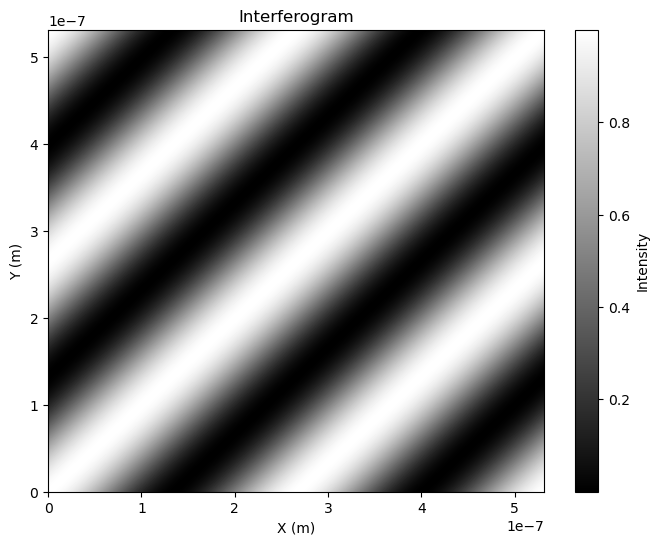

In [13]:
Er_example = np.array([[1], [1j]])
Es_example = np.array([[1], [1j]])

info_example= pi.numeric_intensity(Er_example, Es_example, n=4,plot = True)

In [11]:
alpha, chi, mu, k, x, phi_is, phi_r = sp.symbols('alpha chi mu k x phi_is phi_r', real=True)
A_isx, A_isy, A_rx, A_ry = sp.symbols('A_isx A_isy A_rx A_ry', real=True)

values = {
    alpha: 0,
    chi: 0, 
    mu: 0,
    k: 2 * sp.pi /1, 
    x: 0,
    phi_is: sp.pi/2,
    phi_r: sp.pi/2,
    A_isx: 1/sp.sqrt(2),
    A_isy: 1/sp.sqrt(2),
    A_rx: 1/sp.sqrt(2),
    A_ry: 1/sp.sqrt(2)
}

In [12]:
pi.symbolic_intensity(values)

2.0 + 0.e-113*I

In [ ]:
import sympy as sp

# Definir variables simbólicas
alpha, chi, mu, k, x, phi_is, phi_r = sp.symbols('alpha chi mu k x phi_is phi_r', real=True)
A_isx, A_isy, A_rx, A_ry = sp.symbols('A_isx A_isy A_rx A_ry', real=True)

# Definir vectores de amplitud
A_is = sp.Matrix([[A_isx], [A_isy * sp.exp(1j * phi_is)]])
A_r = sp.Matrix([[A_rx], [A_ry * sp.exp(1j * phi_r)]])

# Definir los coeficientes de la matriz de la lámina de onda
S_xx = sp.cos(alpha)**2 + sp.exp(-1j * chi) * sp.sin(alpha)**2
S_xy = (1 - sp.exp(-1j * chi)) * sp.cos(alpha) * sp.sin(alpha)
S_yx = S_xy
S_yy = sp.sin(alpha)**2 + sp.exp(-1j * chi) * sp.cos(alpha)**2

# Transformar el vector A_is con la lámina de onda
E_sx = S_xx * A_isx + S_xy * A_isy * sp.exp(1j * phi_is)
E_sy = S_yx * A_isx + S_yy * A_isy * sp.exp(1j * phi_is)
E_s = sp.Matrix([[E_sx], [E_sy]])

# Expresiones para la intensidad
Omega = A_r.norm()**2 + E_s.norm()**2
Psi = sp.Abs(A_r.dot(E_s))

# Cálculo de la fase relativa (vartheta)
numerator = -sp.Abs(A_r[1,0]) * sp.Abs(E_s[1]) * sp.sin(sp.arg(A_r[1,0]) - sp.arg(E_s[1]))
denominator = sp.Abs(A_r[0,0]) * sp.Abs(E_s[0]) + sp.Abs(A_r[1,0]) * sp.Abs(E_s[1]) * sp.cos(sp.arg(A_r[1,0]) - sp.arg(E_s[1]))
vartheta = sp.atan(numerator/ denominator)

# Modulación de fase
zeta = 2 * (k * x - vartheta)
cos_term = sp.cos(mu + zeta)


#Expresión simbólica para la intensidad
I = Omega + Psi * cos_term

In [247]:
I

A_isx**2*sin(alpha)**4 + 2*A_isx**2*sin(alpha)**2*cos(alpha)**2 + A_isx**2*cos(alpha)**4 + A_isy**2*sin(alpha)**4 + 2*A_isy**2*sin(alpha)**2*cos(alpha)**2 + A_isy**2*cos(alpha)**4 + A_rx**2 + A_ry**2 + sqrt(A_isx**2*A_rx**2*exp(1.0*I*chi)*sin(alpha)**2*cos(alpha)**2 + A_isx**2*A_rx**2*sin(alpha)**4 + A_isx**2*A_rx**2*cos(alpha)**4 + A_isx**2*A_rx**2*exp(-1.0*I*chi)*sin(alpha)**2*cos(alpha)**2 + A_isx**2*A_rx*A_ry*exp(1.0*I*chi)*exp(1.0*I*phi_r)*sin(alpha)**3*cos(alpha) - A_isx**2*A_rx*A_ry*exp(1.0*I*chi)*exp(-1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(1.0*I*phi_r)*sin(alpha)**3*cos(alpha) + A_isx**2*A_rx*A_ry*exp(1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(-1.0*I*phi_r)*sin(alpha)**3*cos(alpha) + A_isx**2*A_rx*A_ry*exp(-1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 - A_isx**2*A_rx*A_ry*exp(-1.0*I*chi)*exp(1.0*I*phi_r)*sin(alpha)*cos(alpha)**3 + A_isx**2*A_rx*A_ry*exp(-1.0*I*chi)*exp(-1.0*I*phi_r)*sin(alpha)**3*cos(alpha) - A_isx**2*A_ry**2*exp(1.0*I*chi)*

In [256]:
lambda_ = 532e-9

# Ejemplo de evaluación
values = {
    alpha: 0,
    chi: 0, 
    mu: 0,
    k: 2 * sp.pi /lambda_, 
    x: sp.pi/3,
    phi_is: sp.pi/2,
    phi_r: sp.pi/4,
    A_isx: 1/sp.sqrt(2),
    A_isy: 1/sp.sqrt(2),
    A_rx: 1/sp.sqrt(2),
    A_ry: 1/sp.sqrt(2)
}

I_evaluated = I.subs(values).evalf()
I_evaluated



2.05804820212648 + 8.00478830485309e-29*I

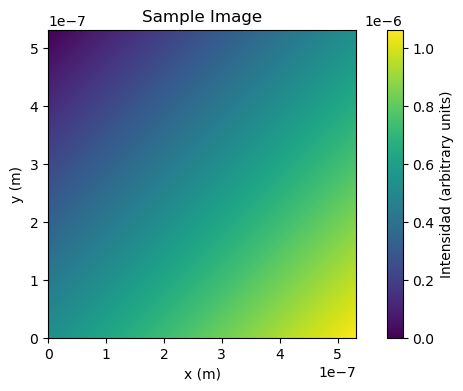

In [257]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos
lambda_ = 532e-9  # Longitud de onda en metros
x_size = 1000  # Número de píxeles en el eje x
y_size = 500   # Número de píxeles en el eje y

# Escalas de conversión de píxeles a metros
x_scale = lambda_ / x_size  # Tamaño de cada píxel en metros en x
y_scale = lambda_ / y_size  # Tamaño de cada píxel en metros en y

# Crear las coordenadas físicas
x_pixels = np.arange(x_size)
y_pixels = np.arange(y_size)
X, Y = np.meshgrid(x_pixels, y_pixels)
X_meters = X * x_scale
Y_meters = Y * y_scale

# Crear la imagen con intensidad de fondo 0 (sample_image)
sample_image = X_meters + Y_meters

# Graficar la imagen
plt.figure(figsize=(8, 4))
plt.imshow(sample_image, cmap='viridis', extent=[0, x_size*x_scale, 0, y_size*y_scale])
plt.colorbar(label='Intensidad (arbitrary units)')
plt.title('Sample Image')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


In [ ]:

# Ejemplo de evaluación
values = {
    alpha: 0,
    chi: 0, 
    mu: 0,
    k: 2 * sp.pi /lambda_, 
    x: X_meters[i, j] + X_meters[i, j],
    phi_is: sp.pi/2,
    phi_r: sp.pi/2,
    A_isx: 1/sp.sqrt(2),
    A_isy: 1/sp.sqrt(2),
    A_rx: 1/sp.sqrt(2),
    A_ry: 1/sp.sqrt(2)
}

I_evaluated = I.subs(values).evalf()
I_evaluated

2.0 + 0.e-113*I

TypeError: Image data of dtype complex128 cannot be converted to float

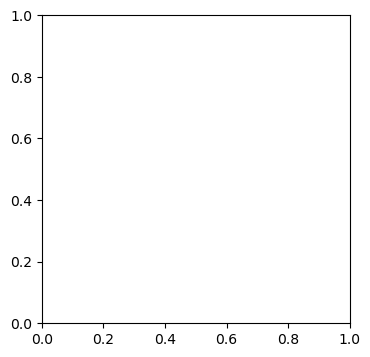

In [245]:
# Evaluar la expresión en cada valor de sample_image
values = {
    alpha: 0,
    chi: 0, 
    mu: 0,
    k: 2 * sp.pi / lambda_, 
    phi_is: sp.pi/2,
    phi_r: sp.pi/2,
    A_isx: 1/sp.sqrt(2),
    A_isy: 1/sp.sqrt(2),
    A_rx: 1/sp.sqrt(2),
    A_ry: 1/sp.sqrt(2)
}

# Generar el mapa de intensidades evaluadas
I_evaluated = sp.lambdify(x, I.subs(values))
intensity_map = I_evaluated(X_meters)


# Graficar el mapa de intensidades evaluadas
plt.figure(figsize=(8, 4))
plt.imshow(intensity_map, cmap='inferno', extent=[0, x_size*x_scale, 0, y_size*y_scale])
plt.colorbar(label='Intensidad evaluada (unidades arbitrarias)')
plt.title('Mapa de Intensidad Evaluada')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
import numpy as np

# Ejemplo de matriz 2D
sample_image = np.array([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])

# Recorrer todos los elementos
for i in range(sample_image.shape[0]):  # Filas
    for j in range(sample_image.shape[1]):  # Columnas
        print(f'Elemento en ({i},{j}): {sample_image[i, j]}')

Elemento en (0,0): 1
Elemento en (0,1): 2
Elemento en (0,2): 3
Elemento en (1,0): 4
Elemento en (1,1): 5
Elemento en (1,2): 6
Elemento en (2,0): 7
Elemento en (2,1): 8
Elemento en (2,2): 9
